In [1]:
import numpy as np
import random
import gymnasium as gym
import Gym_Env
import matplotlib.pyplot as plt

## Sarsa:On-PolicyTDControl

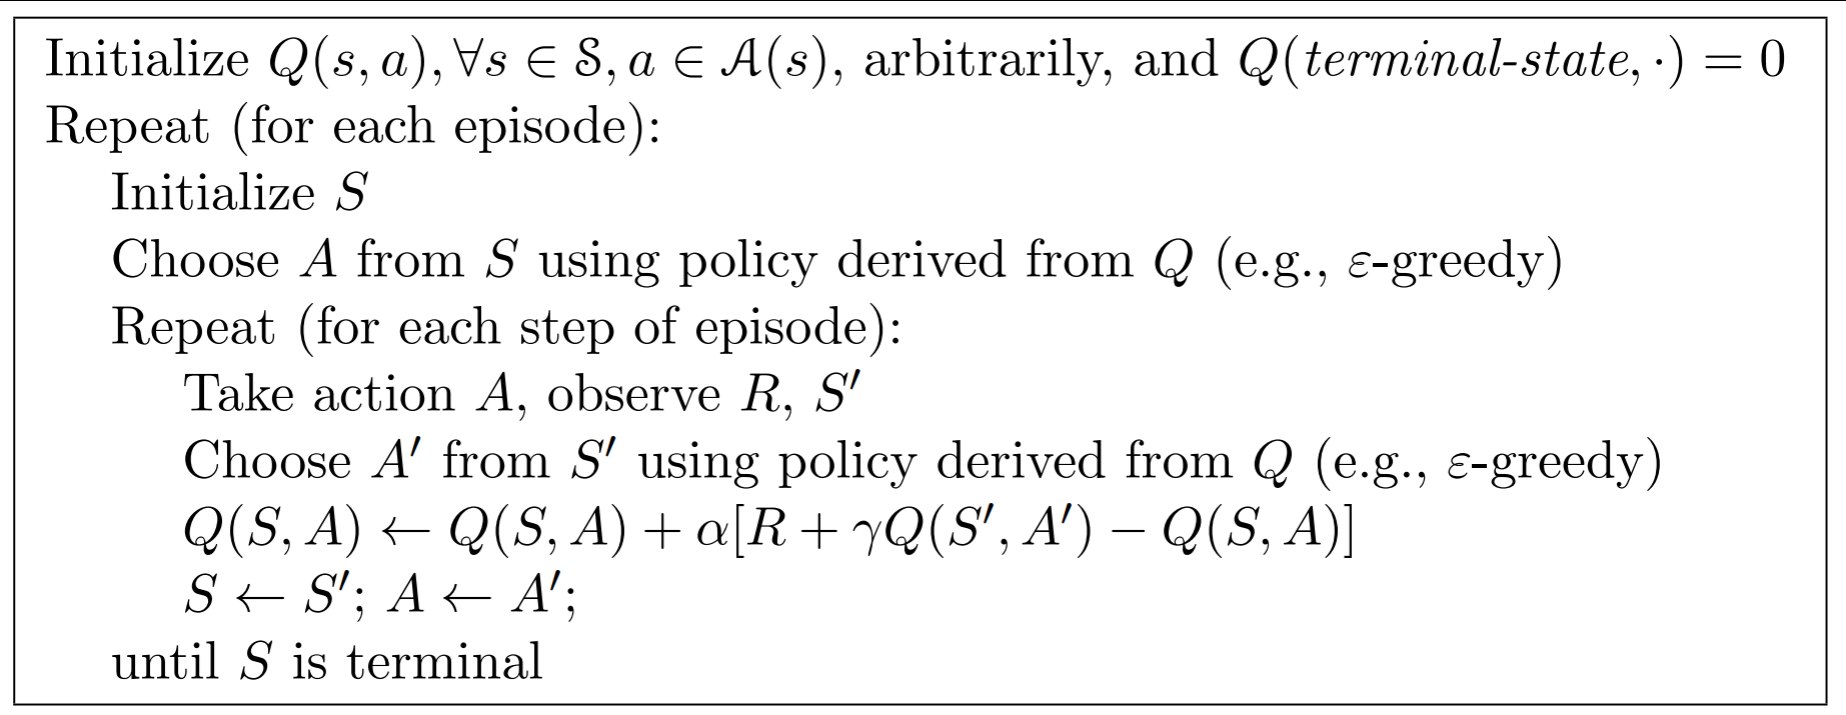

In [2]:
# 1. 定义 epsilon 贪心动作选择函数
def epsilon_greedy_action(Q, epsilon, state):
    if np.random.rand() < 1 - epsilon:
        # p(a = a*|s) = 1 - epsilon + epsilon / |A(s)|
        action = Action[Q[state].argmax()]
    else:
        # p(a = a', a'!= a*|s) = epsilon / |A(s)|
        action = Action[np.random.choice(range(4))]
    return action

In [3]:
# 2. 定义数字对应的Action与R_Action，方便动作价值函数 在选择动作时 对应
Action = {0:"up", 1:"down", 2:"left", 3:"right"}
R_Action = {"up":0, "down":1, "left":2, "right":3}

# 3. 定义Sarsa算法
def SARSA(env, num_episodes=300, max_episode_len=1000, gamma=0.9, epsilon=0.1, alpha=0.5):
    # 1 初始动作价值函数Q，
    # 10,7 表示状态， 4 表明种动作，7行，10列
    # 并且保证对于终止所有动作状态，其价值均为0
    # Q = np.random.uniform(-1, 0, (7, 10, 4)) # zeros(shape)
    # Q[3,7] = np.array([0., 0., 0., 0.])
    Q = np.zeros((70,4))
    
    Reward_Episodes_lis = []
    for i in range(num_episodes):
        # 记录一下 reward
        Total_reward = 0
        # 2 初始化状态，对于 gym 环境编写种，每次reset()都会初始化agent位置为(3,0)
        state = 30
        env.reset()
        # 2 选择动作 根据 Q(epsilon-greedy) 进行动作选择
        action = epsilon_greedy_action(Q, epsilon, state)

        steps = 0
        terminated = False
        # 终止条件设置为要么步数达到限制，要么agent已经抵达了目标
        while (steps <= max_episode_len) & (terminated==False):
            steps += 1

            # 3 执行动作，并且返还观察结果，奖励，以及是否终止
            observation, reward, terminated, _, _ = env.step(action)
            Total_reward += reward
            
            # 3 利用 Q (epsilon-greedy) 进行更新的动作选择，依据上图给出的算法
            next_state = observation["agent"][0]*10 + observation["agent"][1]
            next_action = epsilon_greedy_action(Q, epsilon, next_state)

            # 更新当前 状态与动作 对应的值函数
            TD_error = reward + gamma * Q[next_state, R_Action[next_action]] - Q[state, R_Action[action]]
            Q[state, R_Action[action]] += alpha * TD_error

            # 更新动作与状态
            state, action = next_state, next_action
        
        Reward_Episodes_lis.append(Total_reward)
            
        #epilon 的探索策略，随着episodes增加，会越来越小，但最小是0.05
        epsilon = max(epsilon * 0.99995, 0.05)
    
    # 算法运行结束后, argmax(1), 表示在第1个维度上最大化，即动作维度上
    policy = Q.argmax(1)
    
    return Q, policy, Reward_Episodes_lis

In [4]:
# 4. 初始化环境，并且实用Sarsa算法
env = gym.make('WindyGridWorld-v0', render_mode="rgb_array")
env.reset()
Q, Policy, Reward_Episodes_lis = SARSA(env)

In [5]:
# Action = {0:"up", 1:"down", 2:"left", 3:"right"}
print(Policy)

[3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 2 1 1 3 3 3 3 3 3 1 1 0 1 1 1 3 3 3 3 3
 0 3 1 3 3 3 3 3 3 0 1 2 2 1 3 3 3 3 0 0 1 2 2 3 3 3 3 0 0 0 0 2 1]


In [6]:
# 5. 将Policy转换为容易理解的表格(对应环境Grid图)
TAction = {0:"U", 1:"D", 2:"L", 3:"R"}
replace_func = np.vectorize(lambda x:TAction.get(x, x))
Policy_for_view = replace_func(Policy.reshape(7,10))

Policy_for_view

array([['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D'],
       ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'D', 'D'],
       ['R', 'R', 'R', 'R', 'R', 'R', 'D', 'D', 'U', 'D'],
       ['D', 'D', 'R', 'R', 'R', 'R', 'R', 'U', 'R', 'D'],
       ['R', 'R', 'R', 'R', 'R', 'R', 'U', 'D', 'L', 'L'],
       ['D', 'R', 'R', 'R', 'R', 'U', 'U', 'D', 'L', 'L'],
       ['R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'L', 'D']], dtype='<U1')

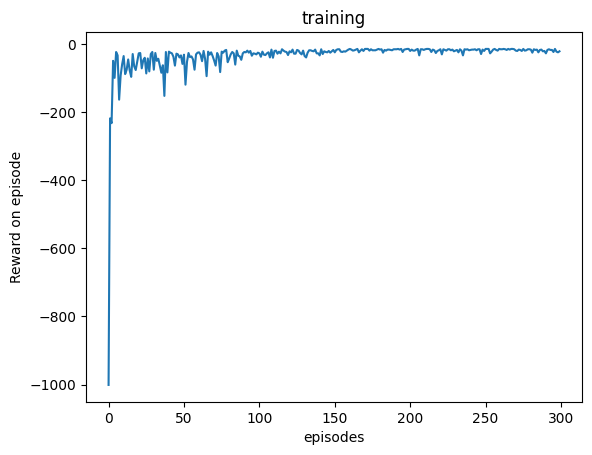

In [7]:
# 6.绘制训练曲线
plt.plot([i for i in range(300)],Reward_Episodes_lis)

# 设置标题和坐标轴标签
plt.title('training')
plt.xlabel('episodes')
plt.ylabel('Reward on episode')

# 显示图形
plt.show()